<a href="https://www.kaggle.com/code/kunalkishore01/ab-testing-marketing-data?scriptVersionId=216185487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

**A/B Testng on ad campaign data**  
Ads were run, and the conversion rates of users were analyzed to statistically evaluate the significance of the association between running ads and customer conversions.  

There are two test groups for A/B testing:
1) **Ad Group**: Users who were exposed to advertisements.
2) **PSA Group**: Users who were exposed to Public Service Announcements (PSAs) and made their buying decisions without seeing any ads on the company website

**Objective**  

The objective of the analysis is to determine whether running ads was a successful strategy and to assess whether the difference between the test groups is statistically significant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


# Data dictionary

**Index**: Row index  
**user id**: User ID (unique)  
**test group**: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement  
**converted**: If a person bought the product then True, else is False  
**total ads**: Amount of ads seen by person  
**most ads day**: Day that the person saw the biggest amount of ads  
**most ads hour**: Hour of day that the person saw the biggest amount of ads  

In [5]:
df.drop(['Unnamed: 0','user id'],axis =1 , inplace =True)

In [6]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [7]:
df_cat=df[['test group', 'converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [8]:
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis
Analyzing Variables to understand how they are distributed in the dataset given  
vaariables to be anbalyzed univariately - 'test group', 'converted','most ads day','most ads hour' to gin some insight on the data set

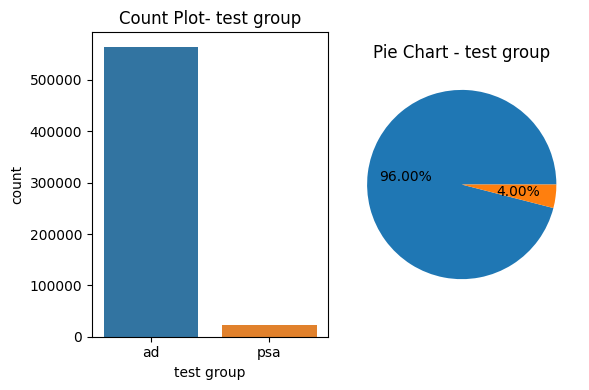

In [9]:
variable='test group'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

Only 4 % user group belongs to the group who hadn't seen the ad out of ~6 lakhs unique users however data taken is significanlty good enough here

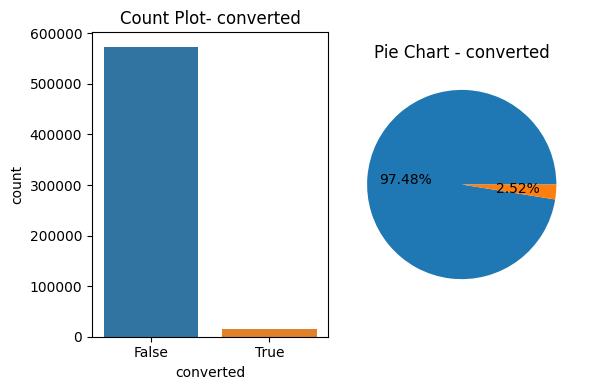

In [10]:
# Overall Conversion
variable='converted'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

Overall Conversion is only 2.52 %, ads are such a costly affairs in the market , we can also calculate the customer acqusition cost (CAC) also is ad cost have been provided

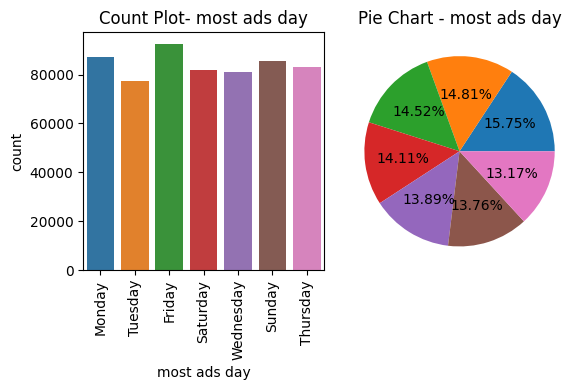

In [11]:

variable='most ads day'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation =90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

There are certain days where most of the ads were shown to the customer, the purpose is to understant the most effective days for running ad camapign for getting highest overall conversion, weekly conversion can also be analyzed here to take decision over WoW  
PS : Will add in the coming version of thre note book

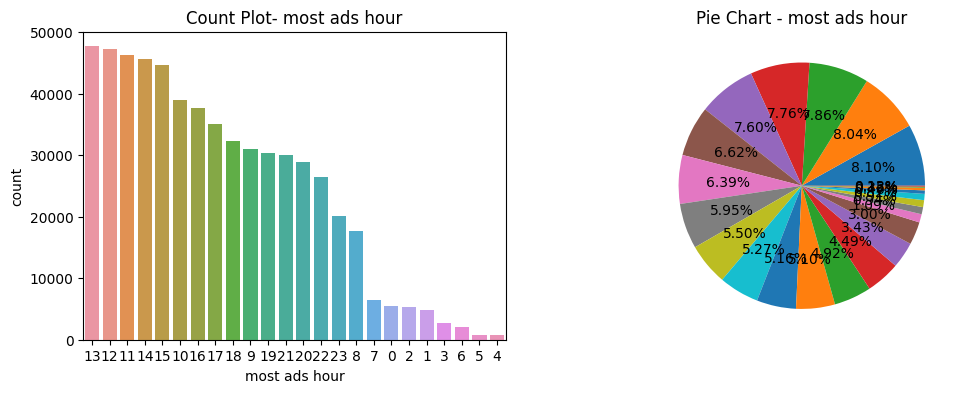

In [12]:
variable='most ads hour'
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
# plt.tight_layout()
plt.show()

Most of the adds are seen in afternoon hours and then around evening hours , early morning there are lesser add were seen by user , so ine can plan to roll out the adds in spme specific hour , this might vary with the product or city or age groups

**Total Ads**  
It is the only numerical feature in the data set,what are the outliers or how it is distributed we csn check. considering it one can predict the target variable 'converted'  if predictive model required to be build

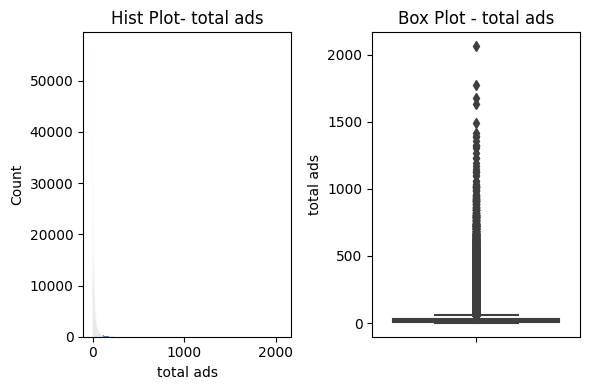

In [13]:
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable,data=df)
plt.title(f'Hist Plot- {variable}')

plt.subplot(1,2,2)
sns.boxplot(y= variable,data = df)
plt.title(f'Box Plot - {variable}')
plt.tight_layout()
plt.show()

In [14]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

Since it has very high max value and significantly high amount of total ads for some of thre users , look at the gap  between 75 %tile and max value  
we can shorten the data by filtering 95 % tile or any other appropriate value to get the data distribution

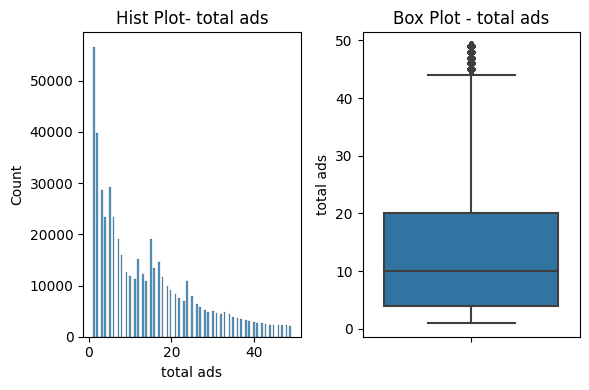

In [15]:
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable,data=df[df['total ads']<50])
plt.title(f'Hist Plot- {variable}')

plt.subplot(1,2,2)
sns.boxplot(y= variable,data = df[df['total ads']<50])
plt.title(f'Box Plot - {variable}')
plt.tight_layout()
plt.show()

left skewed distribution says there are max no user sees between 0-20 total add- how it is connected with the conversions we can look at in the BIVARIATE ANALYIS

# Bivariate Aanalysis

In [16]:
conversion_test_group=pd.crosstab(df['test group'],df['converted'],normalize =  'index')
conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


Conversion Percent for AD group is better than PSA group 

<Axes: xlabel='test group'>

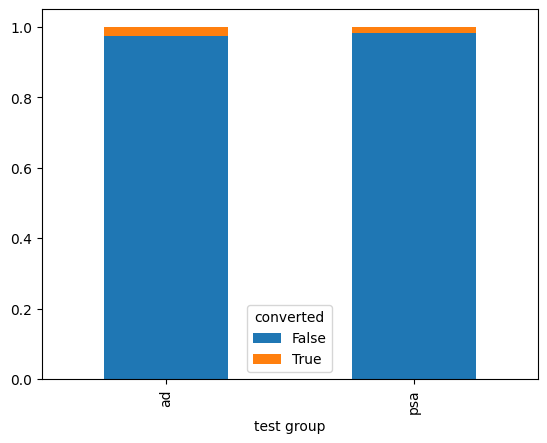

In [17]:
conversion_test_group.plot.bar(stacked= True)

converted        False     True 
most ads day                    
Friday        0.977788  0.022212
Monday        0.967188  0.032812
Saturday      0.978949  0.021051
Sunday        0.975524  0.024476
Thursday      0.978429  0.021571
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942


<Axes: xlabel='most ads day'>

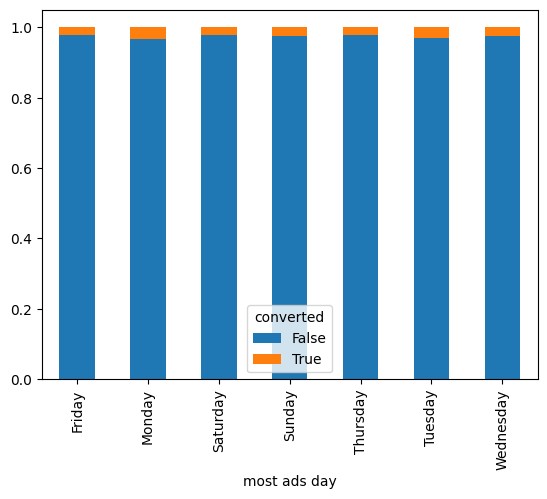

In [18]:
conversion_most_ads_day=pd.crosstab(df['most ads day'],df['converted'],normalize =  'index')
print(conversion_most_ads_day)
conversion_most_ads_day.plot.bar(stacked= True)

Highest conversions are coming from Monday and Tuesdays

In [19]:
conversion_most_ads_hour=pd.crosstab(df['most ads hour'],df['converted'],normalize =  'index')
conversion_most_ads_hour.sort_values(by = True , ascending = False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


In the hourly analysis , evening hour slots are having highest overall conversion

<Axes: xlabel='most ads hour'>

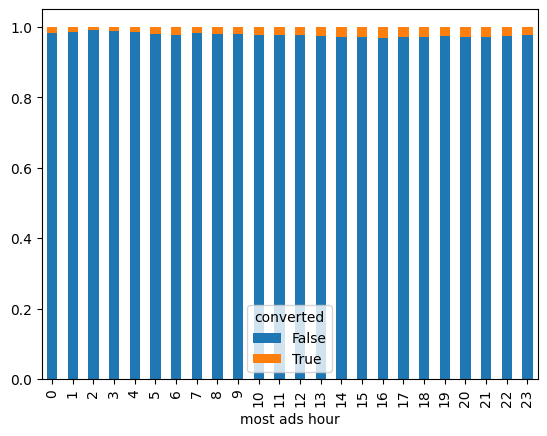

In [20]:
conversion_most_ads_hour.plot.bar(stacked= True)

<Axes: xlabel='converted', ylabel='total ads'>

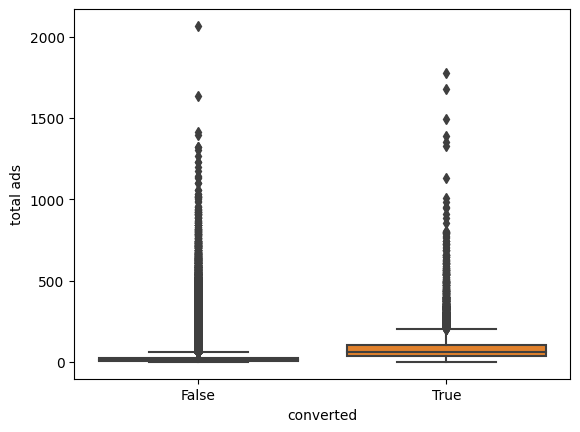

In [21]:
sns.boxplot(x='converted', y='total ads',data = df)

<Axes: xlabel='converted', ylabel='total ads'>

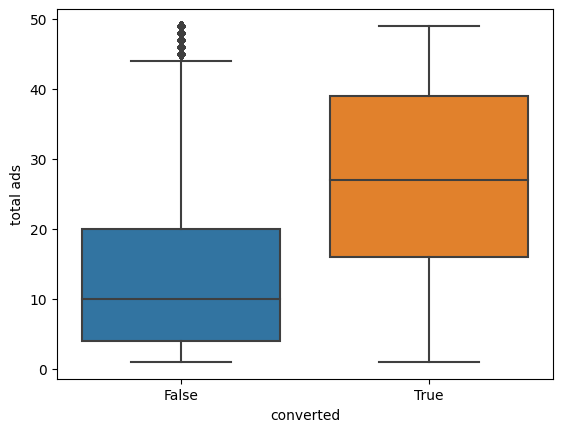

In [22]:
sns.boxplot(x='converted', y='total ads',data = df[df['total ads']<50])

# Statistical Test

## Categorical Variables with the Conversion  

When we talk about categorical variable and their dependency, we will perform chi square test to test their dependency  
variable= ['test group', 'most ads day', 'most ads hour']

Ho:Null Hypothsis : There is no association between {variables} and converted, these two categorical variable are not Associated  
H1 :Alternate Hypothesis : '{variables}'are significantly associated

In [23]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [24]:
from scipy.stats import chi2_contingency
alpha = 0.5
variable= ['test group', 'most ads day', 'most ads hour']
for variable in variable:
        contingency_table = pd.crosstab(df_cat[variable],df_cat['converted'])
        chi2,p,_,_=chi2_contingency(contingency_table)
        print("---------------------------")
        print(f'Chi Square Test for {variable} vs Converted')
        print(f'Chi Square Value:{chi2}')
        print(f'p-value: {p}')
    
        if p<alpha:
            
            print(f"Null Hypothesis Rejected : There is significant assoociation between {variable} and 'converted' variable")
        else:
            print(f"There is no significant association between {variable} and 'converted' variable")
        

---------------------------
Chi Square Test for test group vs Converted
Chi Square Value:54.005823883685245
p-value: 1.9989623063390075e-13
Null Hypothesis Rejected : There is significant assoociation between test group and 'converted' variable
---------------------------
Chi Square Test for most ads day vs Converted
Chi Square Value:410.0478857936585
p-value: 1.932184379244731e-85
Null Hypothesis Rejected : There is significant assoociation between most ads day and 'converted' variable
---------------------------
Chi Square Test for most ads hour vs Converted
Chi Square Value:430.76869230822086
p-value: 8.027629823696771e-77
Null Hypothesis Rejected : There is significant assoociation between most ads hour and 'converted' variable


Hence difference in conversion rates across different test group is statistically significant ,showing the add were significantly impacted  the conversion rates  
Similary difference in conversion rates across days and hours are statisticlly different , hence ad should be shown in the hour of significant conversion rates instead of running it across all the day or hours

## Numerical Variable with Conversion Rates  
Total ads shown to the user in the given data set is a numerical feature. 
first we need to check the   
1) Normality of Distribution and
2) the Equality of Variances

There are two samples: one consists of users who converted and another of users who did not convert. The objective is to analyze the distribution of the total ads shown to each group—those who converted versus those who did not

Then we will compare the mean or median values


In [25]:
print(df.dtypes)

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object


In [26]:
print(df['converted'].unique())
print(df['total ads'].isnull().sum())

[False  True]
0


In [27]:
# shapiro(df[df['converted']== True]['total ads'])

In [28]:
from scipy.stats import shapiro

#Normality Assumptions
shapiro_statistc_true,shapiro_p_value_true = shapiro(df[df['converted']== True]['total ads'])
shapiro_statistc_false,shapiro_p_value_false = shapiro(df[df['converted']== False]['total ads'])

print(f"shapiro_p_value_true: {shapiro_p_value_true}")
print(f"shapiro_p_value_false: {shapiro_p_value_false}")


shapiro_p_value_true: 1.638680987007771e-98
shapiro_p_value_false: 9.883049430735801e-204


Null Hypothesis (𝐻0): The data 'total ads' follows a normal distribution  
p<0.05 , Hence Null Hypothesis rejected ( data doesn't follow the normal distribution

In [29]:
df.groupby('converted')['total ads'].sum()

converted
False    13352036
True      1245146
Name: total ads, dtype: int64

Text(0.5, 1.0, 'Hist Plot False- total ads')

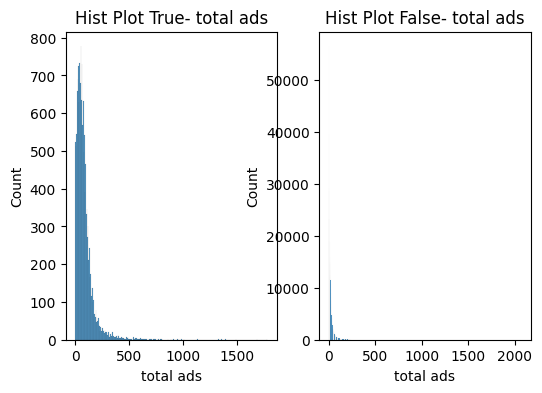

In [30]:
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable,data=df[df['converted']== True])
plt.title(f'Hist Plot True- {variable}')

plt.subplot(1,2,2)
sns.histplot(x= variable,data=df[df['converted']== False])
plt.title(f'Hist Plot False- {variable}')

Null Hypothesis got rejected : Assumption of data being normally distributed is found rejected , we can also see in the ditribution plotted here  
**Both the sample are not normally distributed.**  
There is no need to go for Equality of avariance assumption for the sample (however we can do levene test)  
We can perform Man-Whitney U test for median  

The Mann-Whitney U test (aka Wilcoxon rank-sum test) is a non-parametric test used to determine whether there is a significant difference between the distributions of two independent groups.Mann-Whitney U test does not assume normality of the data.  

we need to test  
H0: **whether the total ads shown to users who converted are significantly different from those who did not convert**


In [31]:
from scipy.stats import mannwhitneyu
converted=df[df['converted']== True]['total ads']
non_converted=df[df['converted']== False]['total ads']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(converted, non_converted, alternative='two-sided')
print(f"mannwhitneyu : stat {stat}")
print(f"mannwhitneyu : p-value {p}")

mannwhitneyu : stat 7269106736.0
mannwhitneyu : p-value 0.0


p<0.05 ; Here Null Hypotheis gets rejected  
Hence there is a significant difference between the two samples.users who converted vs. those who id not have.  
A significant difference suggests that the no of ads shown is associated with whether users converted or not.This could imply that showing more or fewer ads might influence customer conversion behavior

**End of the Project**